In [3]:
from scipy import stats
import numpy as np
np.random.seed(12345678)  #fix random seed to get the same result
n1 = 3000  # size of first sample
n2 = 3000  # size of second sample

In [4]:
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5)
stats.ks_2samp(rvs1, rvs2)

KstestResult(statistic=0.21366666666666667, pvalue=2.3388348510257954e-60)

In [5]:
n1 = 30000  # size of first sample
n2 = 30000  # size of second sample
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5)
stats.ks_2samp(rvs1, rvs2)


KstestResult(statistic=0.21233333333333337, pvalue=0.0)

In [15]:
n1 = 300  # size of first sample
n2 = 300  # size of second sample
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5)
stats.ks_2samp(rvs1, rvs2)

KstestResult(statistic=0.2633333333333333, pvalue=1.4942294797261553e-09)

In [14]:
n1 = 300  # size of first sample
n2 = 300  # size of second sample
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.cosine.rvs(size=n2, loc=0.5, scale=1.5)
stats.ks_2samp(rvs1, rvs2)

KstestResult(statistic=0.27, pvalue=5.01791941596116e-10)

In [7]:
n1 = 30  # size of first sample
n2 = 30  # size of second sample
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5)
stats.ks_2samp(rvs1, rvs2)

KstestResult(statistic=0.26666666666666666, pvalue=0.23907300248018645)

In [8]:
x = np.linspace(-15, 15, 9)
stats.kstest(x, 'norm')


KstestResult(statistic=0.4443560271592436, pvalue=0.03885014008678811)

In [10]:
np.size(x)

9

In [11]:
x = np.linspace(-15, 15, 100)
stats.kstest(x, 'norm')


KstestResult(statistic=0.41847868995611914, pvalue=2.2110220459897132e-16)

In [16]:
x = np.linspace(-15, 15, 1000)
stats.kstest(x, 'norm',N = 1000)


KstestResult(statistic=0.4133645805958034, pvalue=3.757227127957862e-155)

In [13]:
x = np.linspace(-15, 15, 10000)
stats.kstest(x, 'norm')

KstestResult(statistic=0.4128504962538391, pvalue=0.0)

In [29]:
x = np.random.normal(0,1,30000)
test_stat = stats.kstest(x, 'norm')

In [30]:
test_stat

KstestResult(statistic=0.0037771574849452816, pvalue=0.7839430043847648)

In [26]:
np.size(x)

10000

In [32]:
import pandas as pd

In [37]:
arr1 = [1,2,3,4,5,7,8,6,4,2,8]
arr2 = [2,5,9,3,5,7,4,3,8,9,8]

datack = pd.DataFrame() 

In [38]:
datack

""


In [39]:
datack[1] = arr1

In [40]:
datack

,1
0,1
1,2
2,3
3,4
4,5
5,7
6,8
7,6
8,4
9,2


In [41]:
datack[2] = arr2

In [42]:
datack


,1,2
0,1,2
1,2,5
2,3,9
3,4,3
4,5,5
5,7,7
6,8,4
7,6,3
8,4,8
9,2,9


In [4]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv('UCI_Credit_Card.csv', delimiter = ',')

In [63]:
sc = StandardScaler()
sc=StandardScaler() 
yy = np.reshape(data[data.columns[12]].values,(-1,1))
sc.fit(yy)
y_std =sc.transform(yy)
y_std = y_std.flatten()
print(np.min(y_std), np.max(y_std)) #since range is -3 to 12 
param = scipy.stats.norm.fit(y_std)

print(param)
y_std1 = (y_std - np.min(y_std))/(np.max(y_std)- np.min(y_std)) #standardizing to 0 to 1
param1 = scipy.stats.norm.fit(y_std1)
print(np.min(y_std1), np.max(y_std1))

print(param1)
print(scipy.stats.kstest(y_std, 'norm', args = param))
print(scipy.stats.kstest(y_std1, 'norm', args = param1))

-2.9443119518757164 12.402963499080837
(-1.2316074086508403e-17, 1.0)
0.0 1.0
(0.1918459052412593, 0.06515814505288448)
KstestResult(statistic=0.2366617340063037, pvalue=0.0)
KstestResult(statistic=0.23666173400630391, pvalue=0.0)


In [16]:
sorted_data = np.sort(data[data.columns[12]], axis =0)
scaled = ((sorted_data-sorted_data.mean())/sorted_data.std())
y_std= scaled
param = scipy.stats.norm.fit(y_std)
scipy.stats.kstest(y_std, 'norm', args=param)

KstestResult(statistic=0.2366617340063037, pvalue=0.0)

[]

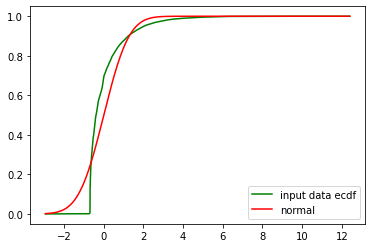

In [17]:
emperical = [(1 + i) / len(y_std) for i in range(len(y_std))]
t = np.linspace(min(y_std), max(y_std),30000)
plt.plot(y_std,emperical, color = 'g', label = 'input data ecdf')
plt.plot(t,scipy.stats.norm.cdf(t,*param[:-2], loc=param[-2], scale=param[-1]), color = 'r', label = "normal")
plt.legend()
plt.plot()

In [19]:
y_std

array([-0.64250107, -0.65921875, -0.29855966, ..., -0.64722711,
       -0.71798186, -0.04473888])

In [32]:
np.min(y_std)

-3.541198287646993

In [33]:
np.max(y_std)

3.3229696550234054

In [41]:
sc = StandardScaler()
sc=StandardScaler() 
yy = np.reshape(np.random.normal(loc = 2, scale = 1.5,size = 30000),(-1,1))
sc.fit(yy)
y_std =sc.transform(yy)
y_std = y_std.flatten()

In [42]:
y_std.mean()

4.4527344774299613e-17

In [43]:
y_std.std()

0.9999999999999999

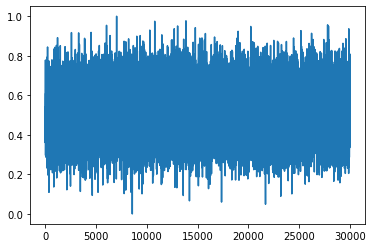

In [45]:
plt.plot(y_std)

In [44]:
y_std = (y_std - np.min(y_std))/(np.max(y_std)- np.min(y_std))

In [46]:
sorted_data = np.sort(data[data.columns[12]], axis =0)
scaled = ((sorted_data-sorted_data.mean())/sorted_data.std())
y_std1= scaled
y_std1 = (y_std1 - np.min(y_std1))/(np.max(y_std1)- np.min(y_std1))

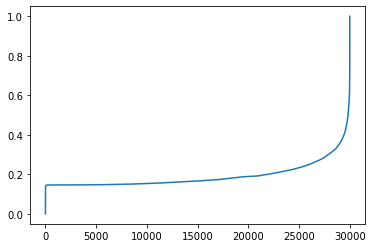

In [47]:
plt.plot(y_std1)

In [50]:
scipy.stats.ks_2samp(y_std,y_std1)

KstestResult(statistic=0.9027333333333334, pvalue=0.0)

In [49]:
y_std = np.sort(y_std)

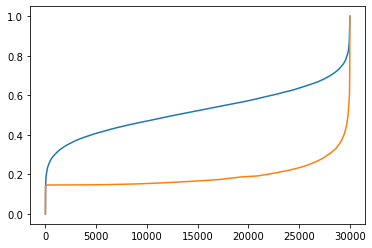

In [51]:
plt.plot(y_std)
plt.plot(y_std1)
plt.show()

In [52]:
sorted_data = y_std
scaled = ((sorted_data-sorted_data.mean())/sorted_data.std())
y_std_2= scaled

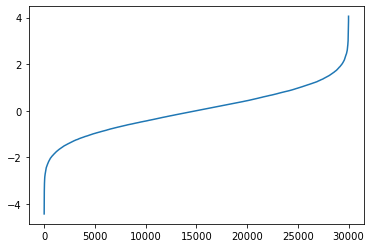

In [53]:
plt.plot(y_std_2)

In [54]:
g = np.random.normal(loc = 0, scale = 1,size = 30000)

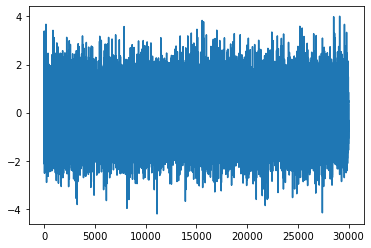

In [55]:
plt.plot(g)

In [57]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the ``normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution